In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer # 사용할 dataset (유방암데이터)
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분
from sklearn.tree import export_graphviz # tree 시각화를 위해
# export_graphviz : 의사결정나무에 대한 graphviz dot data 생성하는 함수
import graphviz # tree 시각화
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
from sklearn.model_selection import cross_val_score, cross_validate # 교차검증

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data_file_csv_final.csv', encoding='utf-8')
data.drop(columns=["Unnamed: 0"],inplace=True)
data

,no,cartype,receipttime,settime,ridetime,startpos1,startpos2,endpos1,endpos2,receipt,...,startlat,startlon,endlat,endlon,startplus,endplus,gotowork,gotoschool,gotocharge,end_destination
0,8075,중형 승합,2022-05-07 오전 12:08:21,2022-05-07 오전 12:15:19,2022-05-07 오전 12:30:26,19,25,3,135,2022/05/07 0:08,...,37.53,126.90,37.49,126.90,7569,7469,0,0,0,0.0
1,8231,중형승합,2022-05-07 오전 12:08:51,2022-05-07 오전 12:17:25,2022-05-07 오전 12:46:23,20,203,9,83,2022/05/07 0:08,...,37.50,126.88,37.47,126.97,7568,7469,0,0,0,0.0
2,8279,중형 승합,2022-05-07 오전 12:09:00,2022-05-07 오전 12:26:57,2022-05-07 오전 12:54:43,15,271,15,124,2022/05/07 0:09,...,37.67,127.08,37.64,127.07,7670,7670,0,0,0,0.0
3,1560,중형 승합,2022-05-07 오전 12:13:00,2022-05-07 오전 12:14:01,2022-05-07 오전 12:14:25,11,78,4,238,2022/05/07 0:13,...,37.59,127.08,37.54,127.13,7570,7571,0,0,0,0.0
4,7913,중형승합,2022-05-07 오전 12:18:00,2022-05-07 오전 1:15:54,2022-05-07 오전 1:33:16,11,49,14,280,2022/05/07 0:18,...,37.61,127.09,37.57,127.06,7670,7570,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,3573,중형 승합,2022-05-09 오전 7:00:28,2022-05-09 오전 7:08:36,2022-05-09 오전 7:29:07,4,290,22,175,2022/05/09 7:00,...,37.55,127.13,37.57,127.01,7571,7570,0,0,0,0.0
2068,8276,중형 승합,2022-05-09 오전 7:01:00,2022-05-09 오전 7:23:59,2022-05-09 오전 7:38:06,19,147,13,22,2022/05/09 7:01,...,37.52,126.90,37.57,126.93,7569,7569,0,0,0,0.0
2069,3602,중형 승합,2022-05-09 오전 7:01:00,2022-05-09 오전 7:26:08,2022-05-09 오전 7:37:38,20,252,20,289,2022/05/09 7:01,...,37.49,126.85,37.50,126.88,7468,7568,0,0,0,0.0
2070,8209,중형승합,2022-05-09 오전 7:01:00,2022-05-09 오전 8:07:22,2022-05-09 오전 8:36:50,24,255,7,29,2022/05/09 7:01,...,37.54,126.84,37.56,126.90,7568,7569,0,0,0,0.0


In [3]:
x=np.array(data.loc[: ,['end_destination', 'startplus',
                        'receipt-ride','hour',
                         'startpos1', 'startpos2']])
y=data['endplus']
#  data train,test로 나누기
x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size=0.1, random_state=42, shuffle=False)

In [4]:
classifier = DecisionTreeClassifier(random_state=10)
classifier = classifier.fit(x_train,y_train) #학습

In [ ]:
#여기서부터 의사결정나무를 그리는 코드
dot_data = export_graphviz(classifier,   # 의사결정나무 모형 대입
                               out_file = None,  # file로 변환할 것인가
                               #feature_names = all_data.feature_names,  # feature 이름
                               #class_names = all_data.target_names,  # target 이름
                               filled = True,           # 그림에 색상을 넣을것인가
                               rounded = True,          # 반올림을 진행할 것인가
                               special_characters = True)   # 특수문자를 사용하나

graph = graphviz.Source(dot_data)

graph

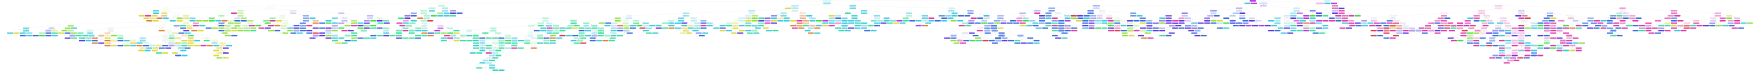

In [5]:
y_pred = classifier.predict(x_test) 
# 학습결과 평가
print("Train_Accuracy : ", classifier.score(x_train, y_train), '\n')
print("Test_Accuracy : ", classifier.score(x_test, y_test), '\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred, average = 'micro')
precision = mt.precision_score(y_test, y_pred, average = 'micro')
f1_score = mt.f1_score(y_test, y_pred, average = 'micro')
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy :  0.9785407725321889 

Test_Accuracy :  0.6442307692307693 

Accuracy:  0.64 

Recall:  0.64 

Precision:  0.64 

F1_score:  0.64 

Confusion Matrix: 
 [[ 4  0  0  0  0  0  0  0  0  0  0]
 [ 1  3  0  0  1  2  1  0  0  0  0]
 [ 0  0  5  0  0  2  1  0  0  0  0]
 [ 0  0  1  3  0  1  0  1  0  0  1]
 [ 0  1  0  0 16  6  4  2  1  0  0]
 [ 1  0  0  1  2 39  2  3  0  0  0]
 [ 0  3  1  0  4  6 21  2  0  2  0]
 [ 0  0  0  1  0  2  2 12  2  2  0]
 [ 0  0  0  0  0  0  0  1 12  0  0]
 [ 0  0  0  0  2  3  1  1  0 19  0]
 [ 0  0  1  0  0  0  1  1  0  1  0]]


In [ ]:
#가지치기가 적용된 의사결정나무 시각화

pruned_dt_clf = DecisionTreeClassifier(max_depth=2, random_state=156) 
pruned_dt_clf .fit(x_train, y_train)
export_graphviz(pruned_dt_clf, out_file="prunedtree.dot", impurity=True, filled=True)
with open("prunedtree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

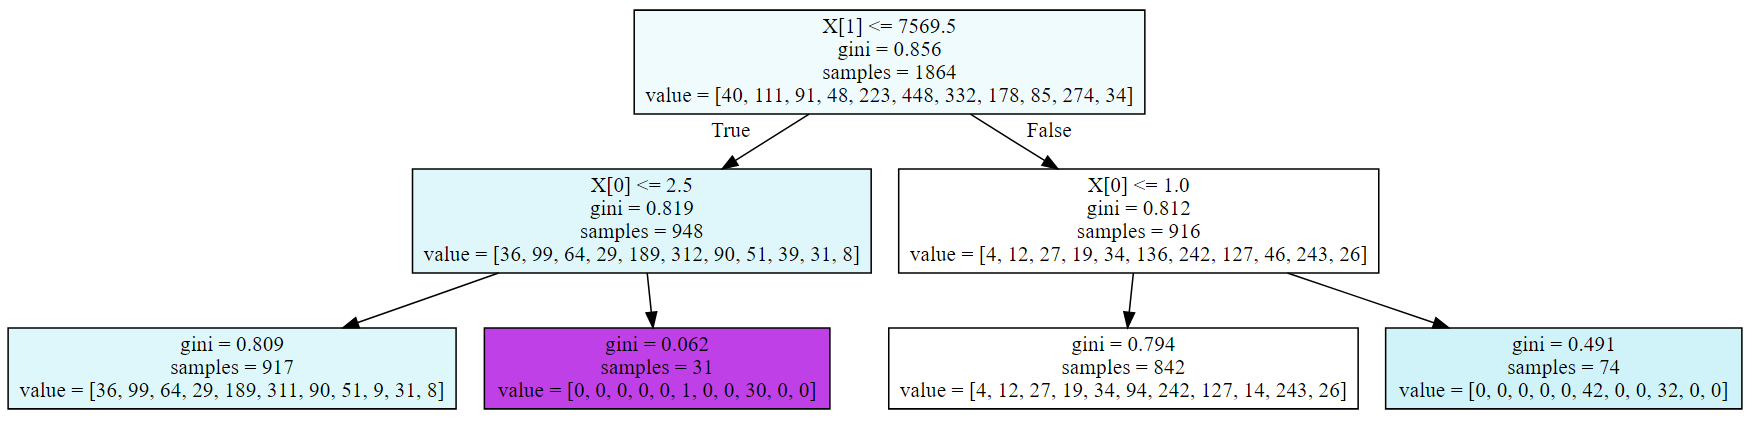